In [1]:
# Setting the output folder where all the results would be stored
outputFolder = '/home/baker/my-scratch-share/James_Bagnall_Bacterial_Workflow_Riken_Misesq_length/output/'

# inputFolder : Folder name with all the fastq files
intputFolder = '/home/baker/my-single-cell-share/James_fastq_Adapter_Untrimmed_Miseq_Size_Trimmed/'

In [2]:
import subprocess, os, csv, signal, pysam, collections, optparse, sys, tempfile, re, optparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import rpy2.interactive as r
import rpy2.interactive.packages # this can take few seconds
import time
#from ZIFA import ZIFA
#from ZIFA import block_ZIFA
import pylab

In [4]:
%load_ext rpy2.ipython

In [7]:
%%R
library(scde)
library(DESeq2)
library(ggplot2)

In [30]:
%%R
BacHighMOI <- read.csv("/home/baker/my-scratch-share/James_Bagnall_Bacterial_Workflow_Riken_Misesq_length/output/featureCount_output/AllFeatureCountsModifiedForCalc.csv", header=TRUE, row.names=1)
head(BacHighMOI)

                      C01 C02 C03 C04 C05 C06 C07 C08 C09 C10 C11 C12 C13 C14
ENSMUSG00000000001.4    0   0   0   0   0   0   0   0   0   0   0   0   0   0
ENSMUSG00000000003.12   0   0   0   0   0   0   0   0   0   0   0   0   0   0
ENSMUSG00000000028.11   0   0   0   0   0   0   0   0   0   0   0   0   0   0
ENSMUSG00000000031.12   0   0   0   0   0   0   0   0   0   0   0   0   0   0
ENSMUSG00000000037.13   0   0   0   0   0   0   0   0   0   0   0   0   0   0
ENSMUSG00000000049.8    0   0   0   0   0   0   0   0   0   0   0   0   0   0
                      C15 C16 C17 C18 C19 C20 C21 C22 C23 C24 C25 C26 C27 C28
ENSMUSG00000000001.4    0   0   0   0   0   0   0   0   0   0   0   0   0   0
ENSMUSG00000000003.12   0   0   0   0   0   0   0   0   0   0   0   0   0   0
ENSMUSG00000000028.11   0   0   0   0   0   0   0   0   0   0   0   0   0   0
ENSMUSG00000000031.12   0   0   0   0   0   0   0   0   0   0   0   0   0   0
ENSMUSG00000000037.13   0   0   0   0   0   0   0   0   0   0   

In [21]:
%%R
CV <- function(mean, sd){
      (sd/mean)^2
}

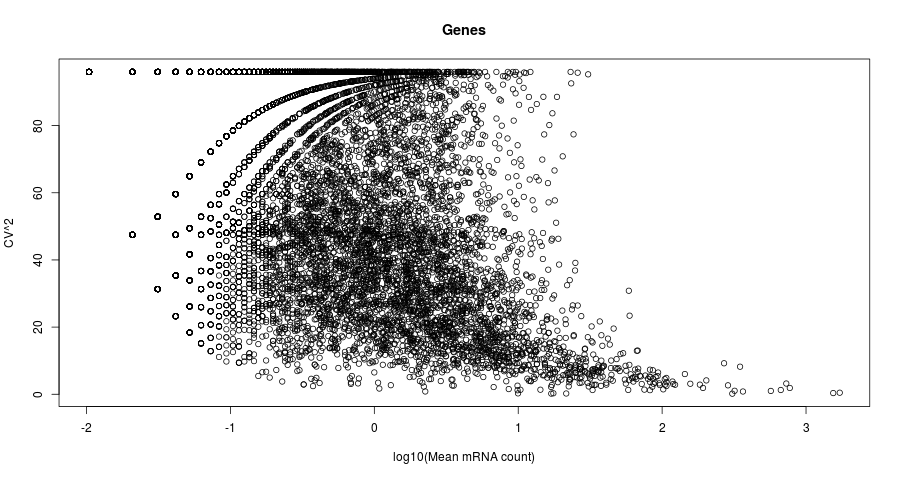

In [38]:
%%R -w 900
MeanAcrossGenes <- rowMeans(BacHighMOI)
sdAcrossGenes <- apply(BacHighMOI,1,sd)
CVacrossGenes <- CV(MeanAcrossGenes, sdAcrossGenes)
df<-data.frame(LogMean=log10(MeanAcrossGenes),CVSquared=CVacrossGenes)
#print(head((MeanAcrossGenes)))
#p <- ggplot(df, aes_string(x="LogMean",y ="CVSquared"))
#print(p)
plot(log10(MeanAcrossGenes), CVacrossGenes, xlab='log10(Mean mRNA count)', ylab = 'CV^2', main='Genes')

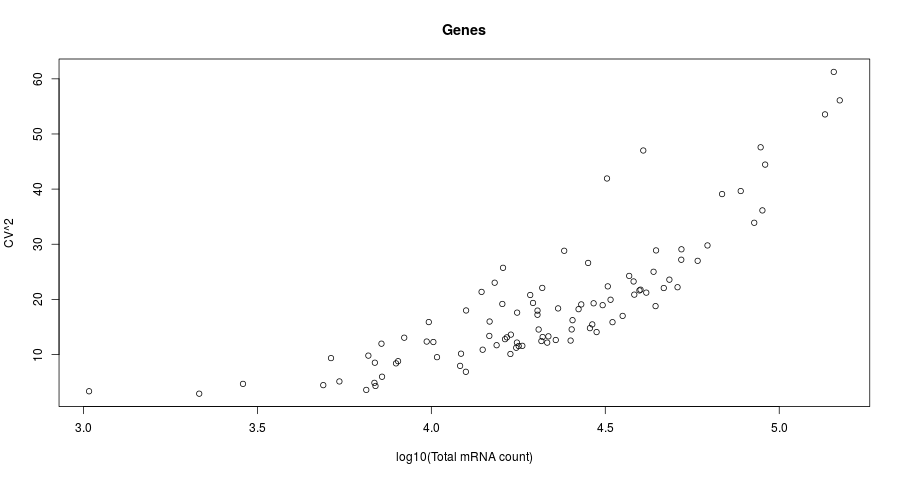

In [49]:
%%R -w 900
MeanAcrossCells <- colMeans(BacHighMOI)
sdAcrossCells <- apply(BacHighMOI,2,sd)
CVacrossCells <- CV(MeanAcrossCells, sdAcrossCells)
plot(log10(colSums(BacHighMOI)), sdAcrossCells, xlab='log10(Total mRNA count)', ylab = 'CV^2', main='Genes')